In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Reading and understanding dataset

In [2]:
# Loading dataset
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# checking size of dataset
df.shape

(1460, 81)

In [4]:
# checking information (d-type, null values) of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Checking any presence of duplicate value in datatset
df[df.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [6]:
# List of variables names with NA or NaN values 
df.loc[:,df.isna().any(axis=0)].columns

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [7]:
df.loc[:,df.isna().any(axis=0)]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [8]:
# Calculating the percentage of NA present in each variable
col_list_NA = ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature']
df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

# Data Cleaning

In [9]:
# dropping features with high percentage of NaN values
drop_col = ['Alley','PoolQC','MiscFeature','LotFrontage','Fence','FireplaceQu','Id']
df.drop(drop_col, axis=1, inplace=True)

In [10]:
df.shape

(1460, 74)

In [11]:
df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
# Finding 90% thresold value

thresold_value = 1460*90/100
thresold_value

1314.0

In [13]:
# printing features containing skewness 
list_col_skrew = []
for col in df:
    if df[col].value_counts().max() >= 1314:
        list_col_skrew.append(col)
list_col_skrew

['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [14]:
# dropping above listed features containing skewness to avoid bias in data and violation of linear assumptions
df.drop(list_col_skrew, axis=1, inplace=True)
df.shape

(1460, 56)

In [15]:
df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,12.000000,2010.000000,755000.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   Condition1     1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1452 non-null   object 
 18  MasVnrAr

In [17]:
# percentage of NaN values present in each feature
df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

MasVnrType      0.547945
MasVnrArea      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
dtype: float64

### Deriving new features

In [18]:
# Deriving new column with how much year old Building,Remodelling, Garage build and last sold year

df['YrSold_Old'] = df.YrSold.max() - df.YrSold
df['YearRemodAdd_Old'] = df.YearRemodAdd.max() - df.YearRemodAdd
df['YearBuilt_Old'] = df.YearBuilt.max() - df.YearBuilt
df['GarageYrBlt_Old'] = df.GarageYrBlt.max() - df.GarageYrBlt

In [19]:
# Dropping features as new features have been derived 
df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

In [20]:
df[['GarageYrBlt_Old','YrSold_Old','YearBuilt_Old','YearRemodAdd_Old']].head()

,GarageYrBlt_Old,YrSold_Old,YearBuilt_Old,YearRemodAdd_Old
0,7.0,2,7,7
1,34.0,3,34,34
2,9.0,2,9,8
3,12.0,4,95,40
4,10.0,2,10,10


In [21]:
# GarageYrBl_Old is NaN for those houses which has no garage.
# House with no garage should put negative impact on selling price of the Price.
# Repacing GarageYrBl_Old with -1 value.

df.GarageYrBlt_Old.fillna(-1,inplace=True)

In [22]:
df.loc[:,df.isna().any(axis=0)].columns

Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish',
       'GarageQual'],
      dtype='object')

In [23]:
# observing count of values in each feature
columns = ['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish',
       'GarageQual']
for col in columns:
    print(col + " value count")
    #if col == MasVnrType:
    print(df[col].value_counts())

MasVnrType value count
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
MasVnrArea value count
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64
BsmtQual value count
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
BsmtCond value count
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
BsmtExposure value count
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
BsmtFinType1 value count
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
BsmtFinType2 value count
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
GarageType value count
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: in

In [24]:
# Imputing value of mode in place of NaN values in categorical features
cat_var_list = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual']
for col in cat_var_list:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [25]:
# Imputing value of mean in place of NaN values in MasVnrArea which is an numerical feature
df.MasVnrArea.fillna(df.MasVnrArea.mean(),inplace=True)

In [26]:
# checking for any presence of null value in data after doing imputation
df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

Series([], dtype: float64)

In [27]:
# Checking value count of each feature after doing imputation
columns = ['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual']
for col in columns:
    print(col + "value count")
    #if col == MasVnrType:
    print(df[col].value_counts(),"/n/n")

MasVnrTypevalue count
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64 /n/n
MasVnrAreavalue count
0.000000      861
103.685262      8
72.000000       8
108.000000      8
180.000000      8
             ... 
562.000000      1
89.000000       1
921.000000      1
762.000000      1
119.000000      1
Name: MasVnrArea, Length: 328, dtype: int64 /n/n
BsmtQualvalue count
TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64 /n/n
BsmtCondvalue count
TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64 /n/n
BsmtExposurevalue count
No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64 /n/n
BsmtFinType1value count
Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64 /n/n
BsmtFinType2value count
Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64 /n/n
GarageTypevalue count
Attchd     951
Detchd     387
Built

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   int64  
 1   MSZoning          1460 non-null   object 
 2   LotArea           1460 non-null   int64  
 3   LotShape          1460 non-null   object 
 4   LandContour       1460 non-null   object 
 5   LotConfig         1460 non-null   object 
 6   Neighborhood      1460 non-null   object 
 7   Condition1        1460 non-null   object 
 8   BldgType          1460 non-null   object 
 9   HouseStyle        1460 non-null   object 
 10  OverallQual       1460 non-null   int64  
 11  OverallCond       1460 non-null   int64  
 12  RoofStyle         1460 non-null   object 
 13  Exterior1st       1460 non-null   object 
 14  Exterior2nd       1460 non-null   object 
 15  MasVnrType        1460 non-null   object 
 16  MasVnrArea        1460 non-null   float64


In [29]:
df.shape

(1460, 56)

In [30]:
# continuous features list
df.iloc[:, (np.where((df.dtypes == np.int64) | (df.dtypes == np.float64)))[0]].columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold',
       'SalePrice', 'YrSold_Old', 'YearRemodAdd_Old', 'YearBuilt_Old',
       'GarageYrBlt_Old'],
      dtype='object')

In [31]:
# Categorical features list
num_col = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold',
       'SalePrice', 'YrSold_Old', 'YearRemodAdd_Old', 'YearBuilt_Old',
       'GarageYrBlt_Old']
cat_var = [col for col in df if col not in num_col]
cat_var

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'SaleType',
 'SaleCondition']

<Figure size 1440x864 with 0 Axes>

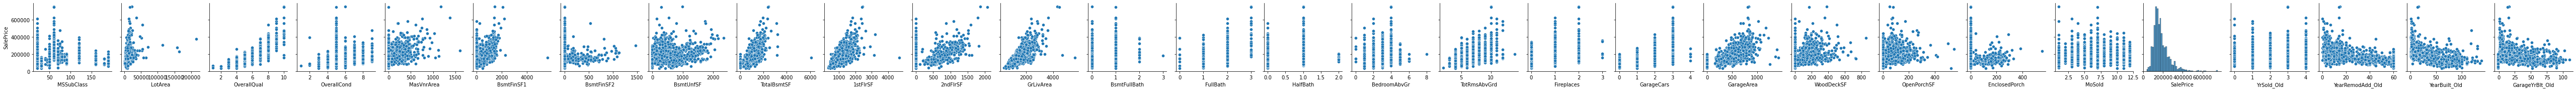

In [32]:
plt.figure(figsize=(20,12))
sns.pairplot(data=df, y_vars="SalePrice", x_vars=num_col)
plt.show()

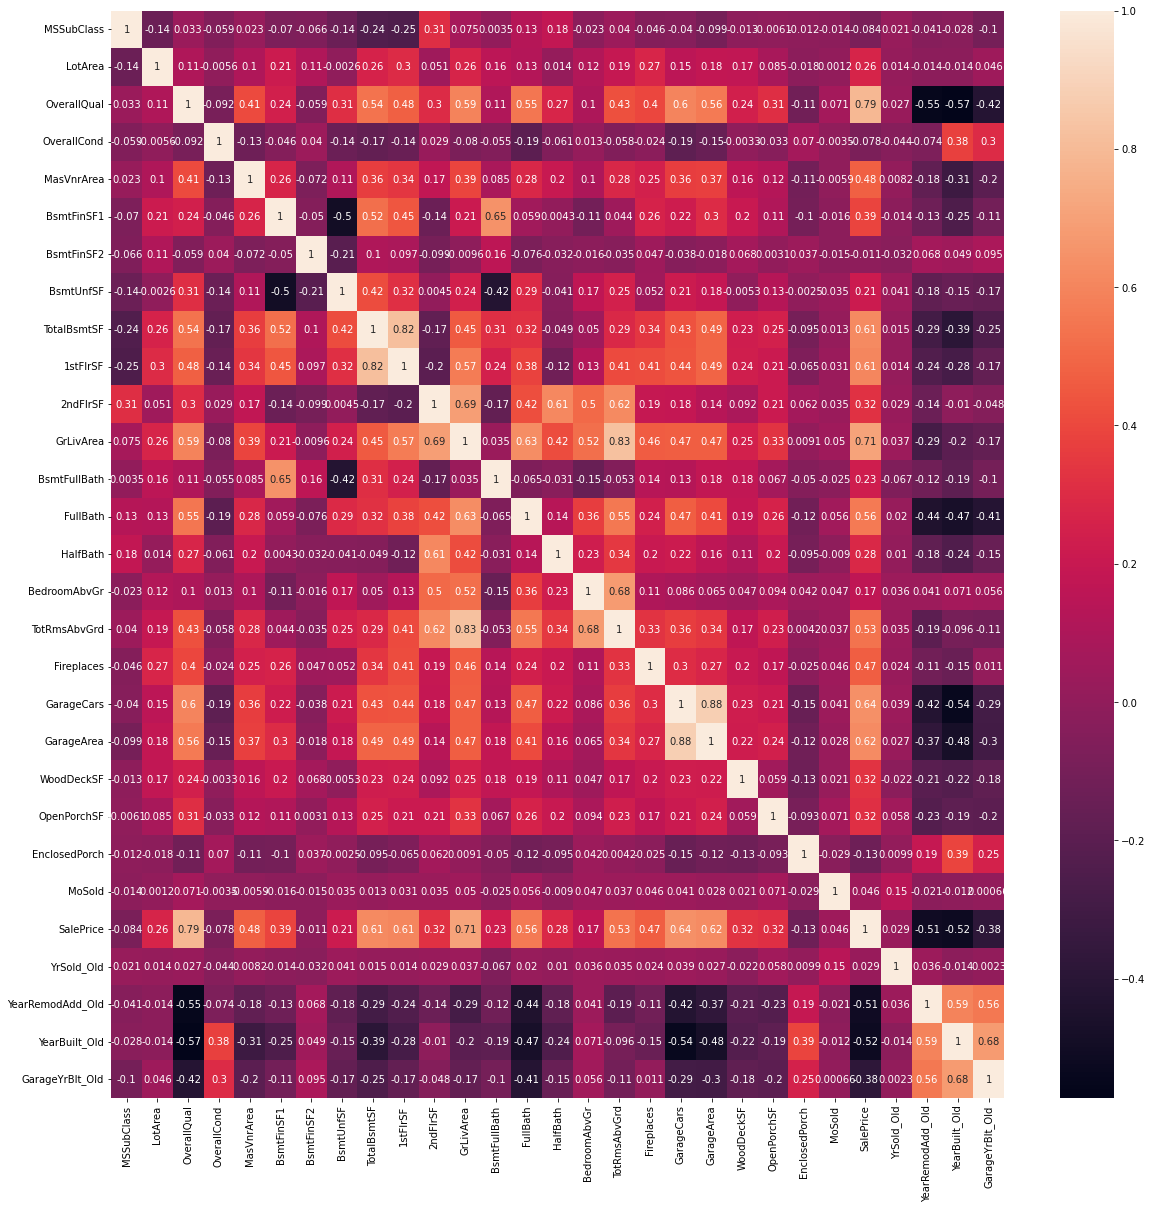

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(df[list(df.dtypes[df.dtypes!='object'].index)].corr(),annot=True)
plt.show()

# Outlier detection of numerical features and removing outliers

In [34]:
df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,YrSold_Old,YearRemodAdd_Old,YearBuilt_Old,GarageYrBlt_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,472.980137,94.244521,46.660274,21.954110,6.321918,180921.195890,2.184247,25.134247,38.732192,29.691096
std,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,...,213.804841,125.338794,66.256028,61.119149,2.703626,79442.502883,1.328095,20.645407,30.202904,25.121824
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,0.000000,-1.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,334.500000,0.000000,0.000000,0.000000,5.000000,129975.000000,1.000000,6.000000,10.000000,7.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,480.000000,0.000000,25.000000,0.000000,6.000000,163000.000000,2.000000,16.000000,37.000000,25.500000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,576.000000,168.000000,68.000000,0.000000,8.000000,214000.000000,3.000000,43.000000,56.000000,48.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,1418.000000,857.000000,547.000000,552.000000,12.000000,755000.000000,4.000000,60.000000,138.000000,110.000000


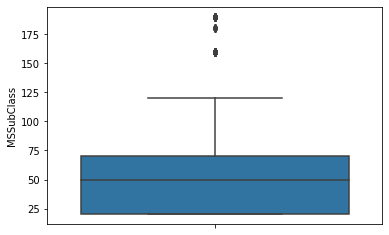

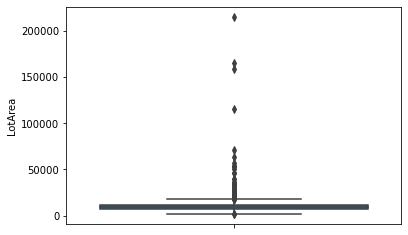

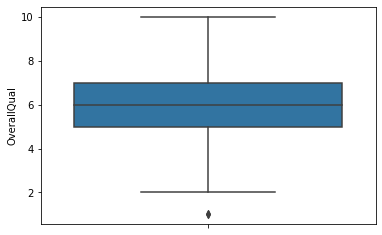

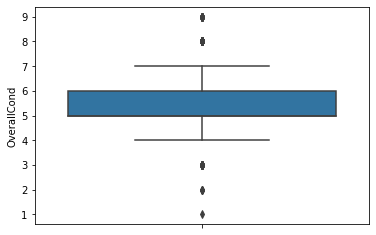

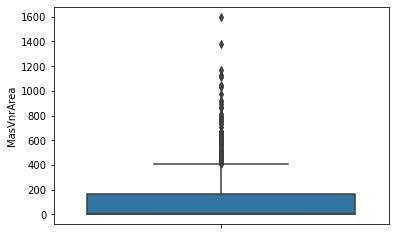

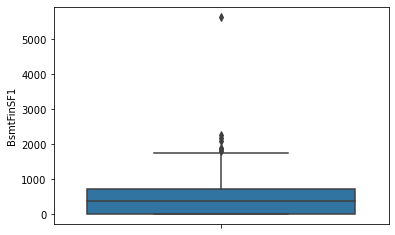

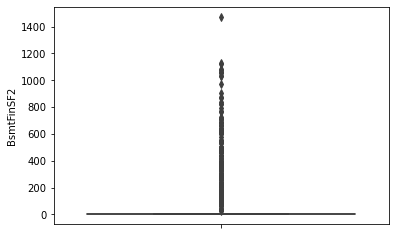

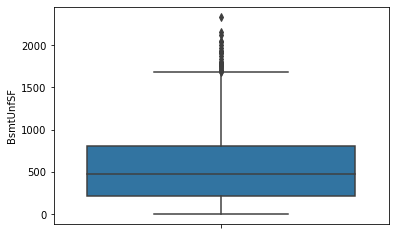

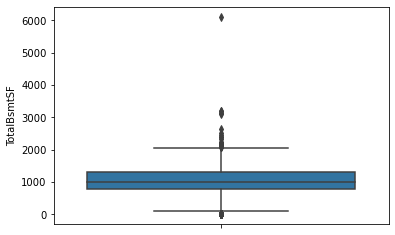

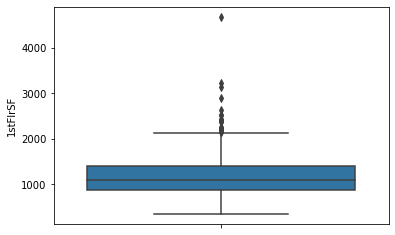

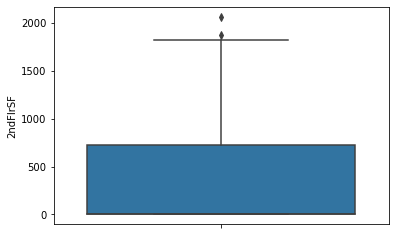

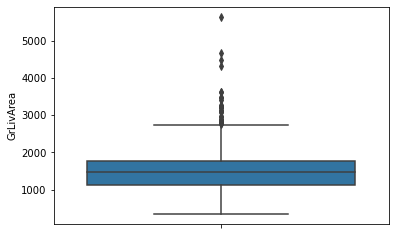

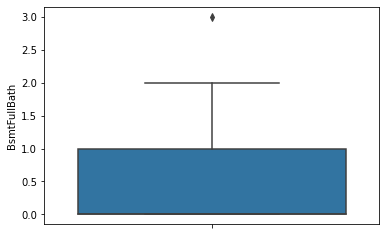

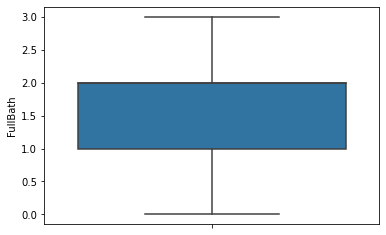

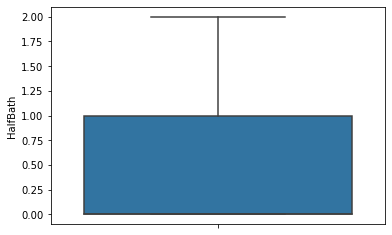

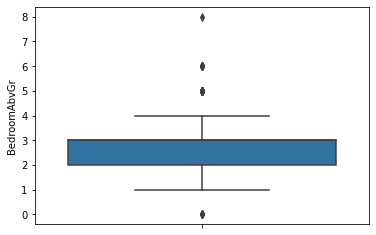

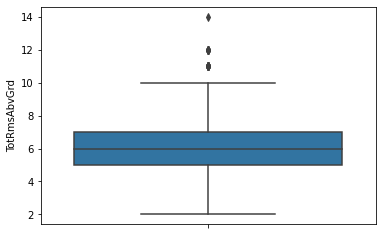

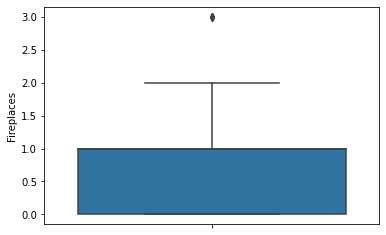

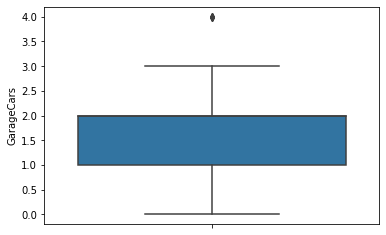

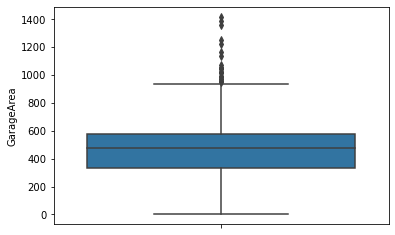

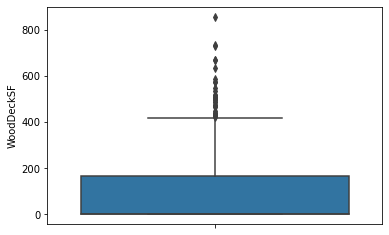

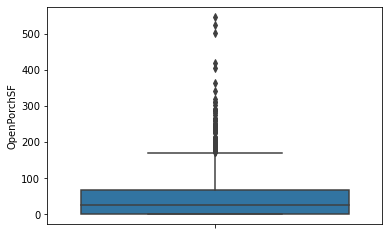

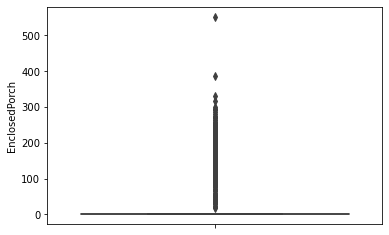

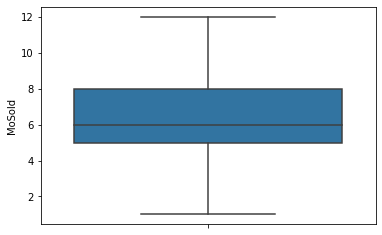

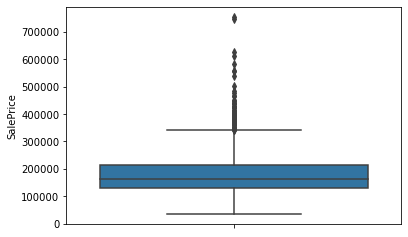

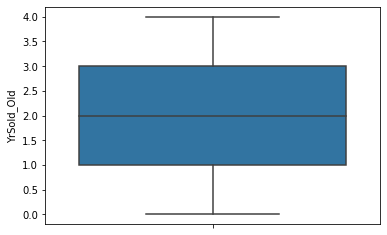

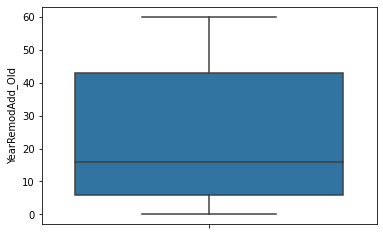

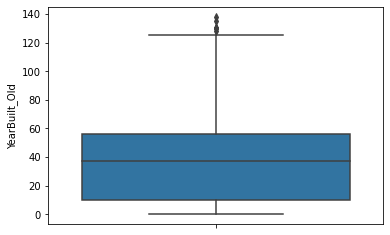

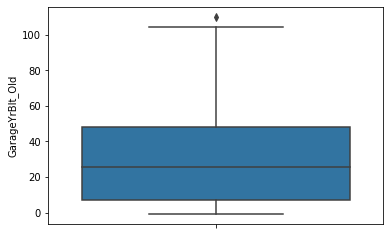

In [35]:
num_columns = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold',
       'SalePrice', 'YrSold_Old', 'YearRemodAdd_Old', 'YearBuilt_Old',
       'GarageYrBlt_Old']
for col in num_columns:
    plt.figure()
    sns.boxplot(y=df[col])
    plt.show()

In [36]:
# Handling outliers of numerical variables by taking upper_quantile=0.95 and lower_quantile=0.25
num_col =['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold',
       'SalePrice', 'YrSold_Old', 'YearRemodAdd_Old', 'YearBuilt_Old',
       'GarageYrBlt_Old']
def drop_outliers(x):
    lists = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.95)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df = drop_outliers(df)

In [37]:
# First there was 1460 rows but after removing outliers there are only 1417 rows left
df.shape

(1417, 56)

In [38]:
# detecting the highly skewed column data
cols_drop = []
for col in df.columns :
    max_pct = np.max(df[col].value_counts(normalize=True) * 100)
    if (max_pct > 90) :
        print(col, 'Max percentage of value=', str(max_pct))
        cols_drop.append(col)

LandContour Max percentage of value= 90.75511644318985
BsmtCond Max percentage of value= 92.37826393789696
GarageQual Max percentage of value= 95.41284403669725


In [39]:
# dropping or removing highly skewed column data
df.drop(cols_drop, axis=1, inplace=True)

In [40]:
df.shape

(1417, 53)

In [41]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'SaleType', 'SaleCondition',
       'SalePrice', 'YrSold_Old', 'YearRemodAdd_Old', 'YearBuilt_Old',
       'GarageYrBlt_Old'],
      dtype='object')

# Data Transformation

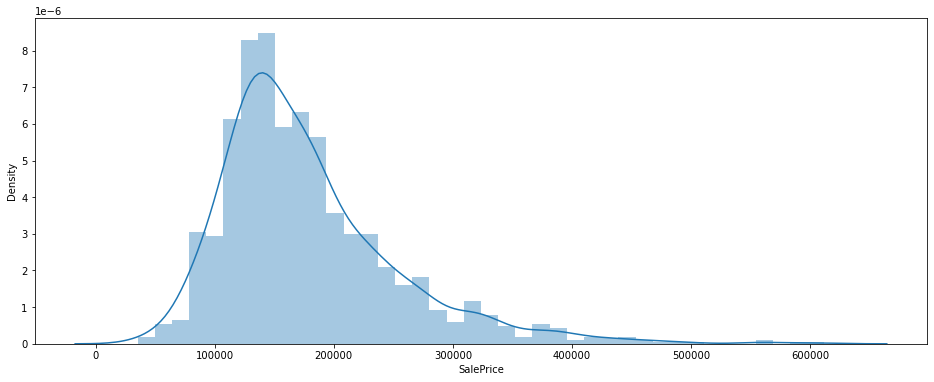

In [42]:
# checking distribution of target variables
plt.figure(figsize=(16,6))
sns.distplot(df.SalePrice)
plt.show()

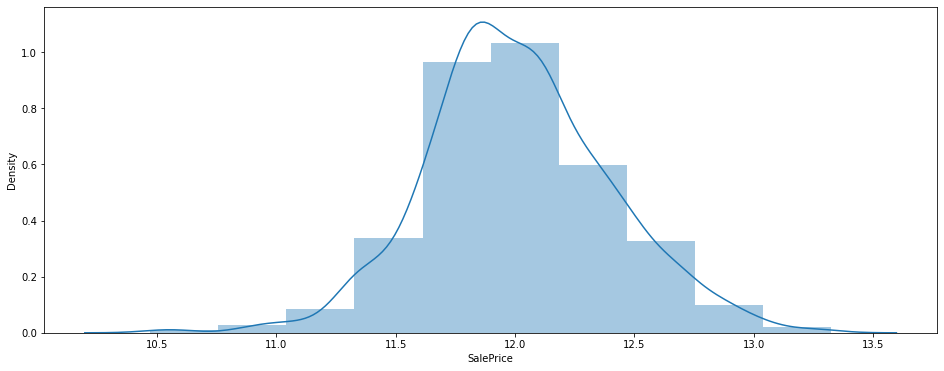

In [43]:
df['SalePrice'] = np.log(df.SalePrice)
plt.figure(figsize=(16,6))
sns.distplot(df.SalePrice, bins=10)
plt.show()

In [44]:
df.SalePrice.describe()

count    1417.000000
mean       12.012220
std         0.389898
min        10.471950
25%        11.767568
50%        11.982929
75%        12.254863
max        13.323927
Name: SalePrice, dtype: float64

# EDA

<Figure size 1440x864 with 0 Axes>

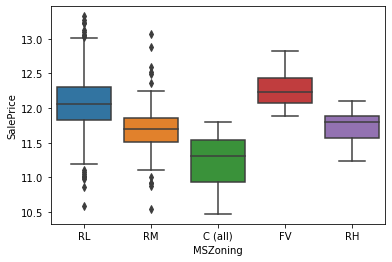

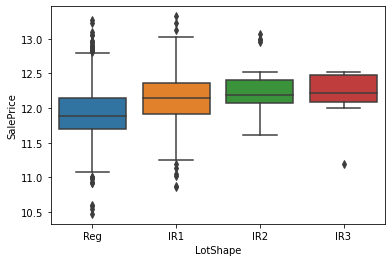

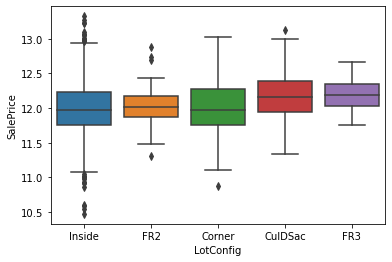

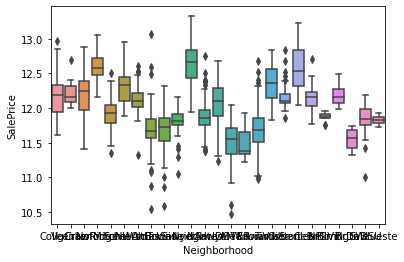

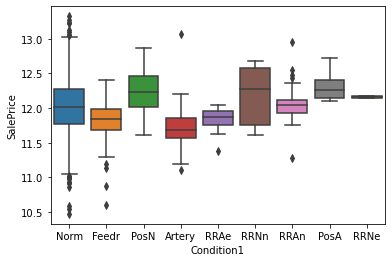

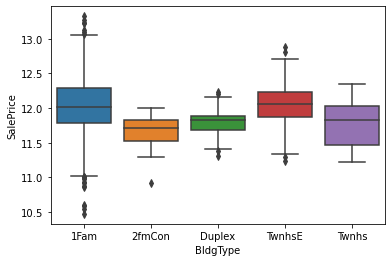

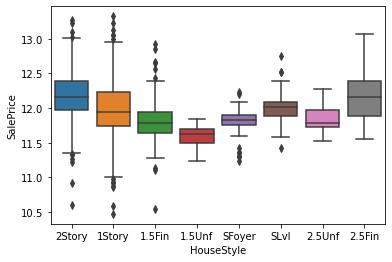

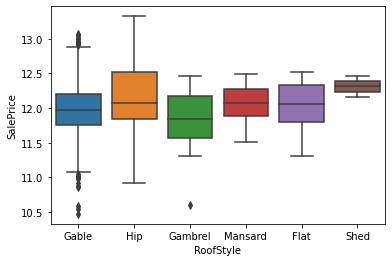

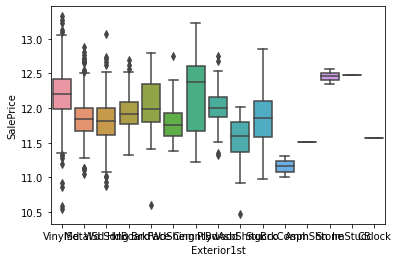

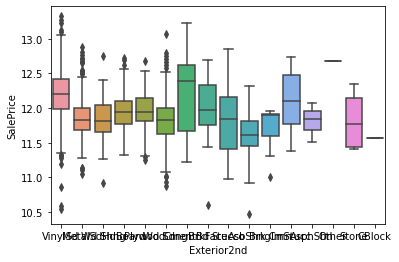

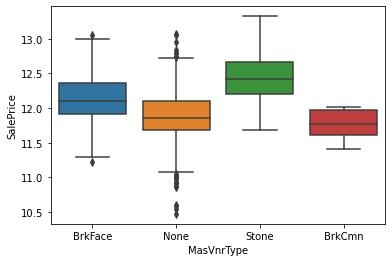

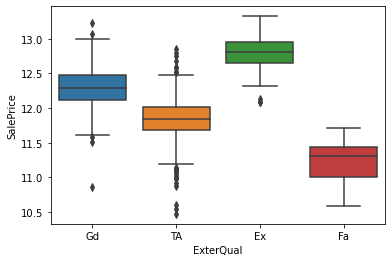

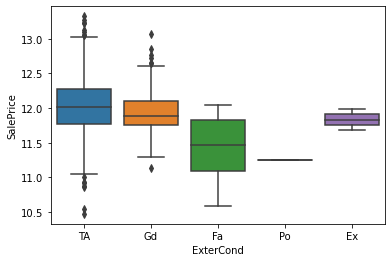

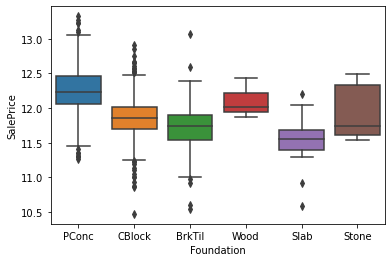

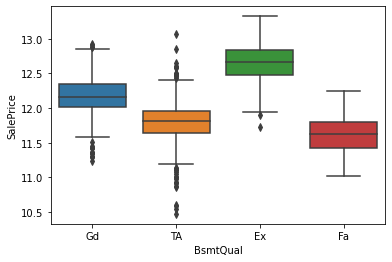

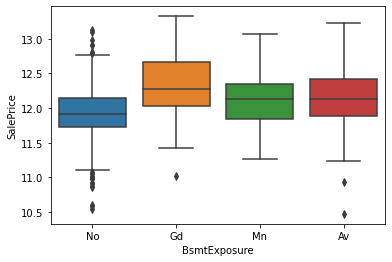

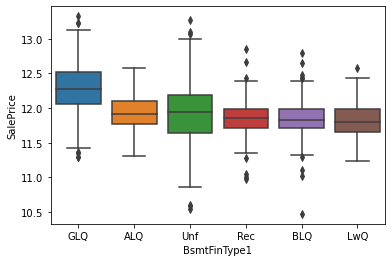

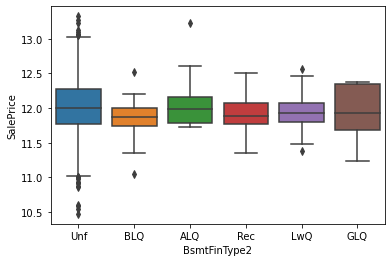

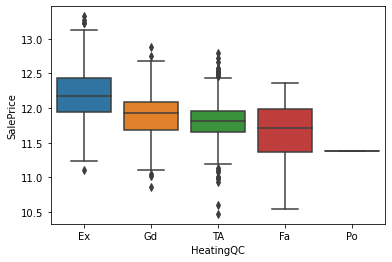

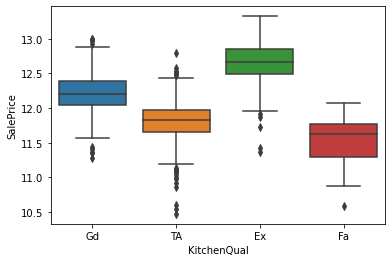

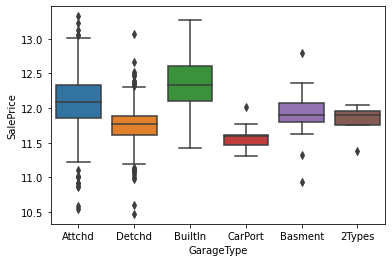

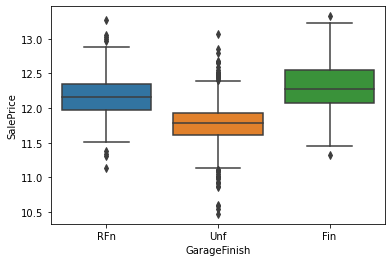

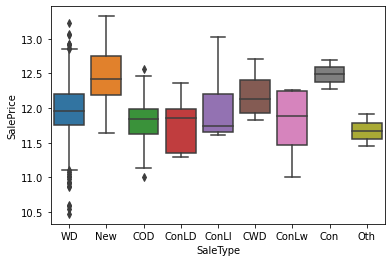

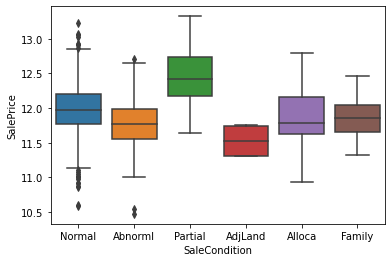

In [45]:
# Analysing categorical variables with target variables
plt.figure(figsize=(20,12))
cat_columns = ['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'SaleType',
 'SaleCondition']
for col in cat_columns:
    plt.figure()
    sns.boxplot(x=col, y='SalePrice', data=df)
    plt.show()

In [46]:
# Pairplot of numerical or continuous variables
sns.pairplot(data=df,vars=num_columns)
plt.show()

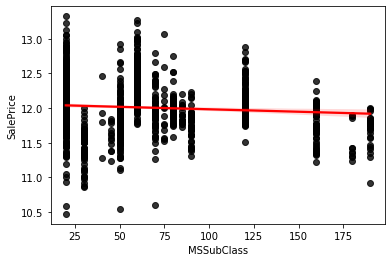

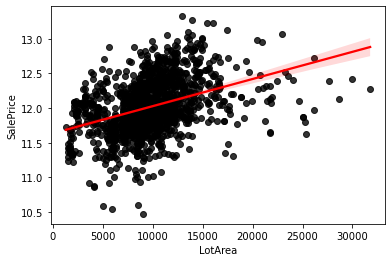

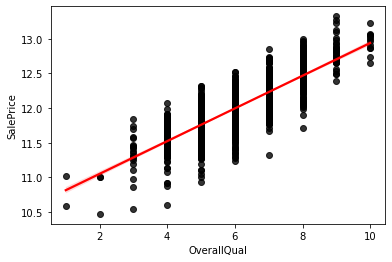

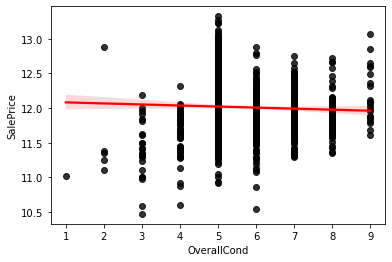

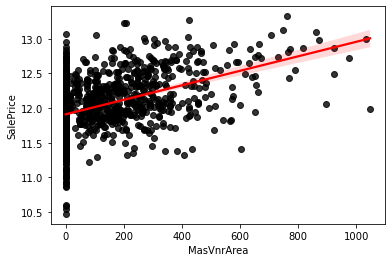

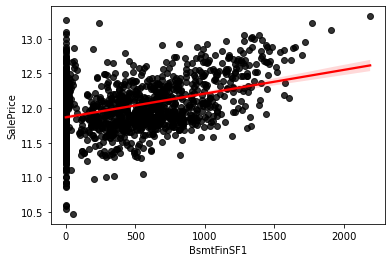

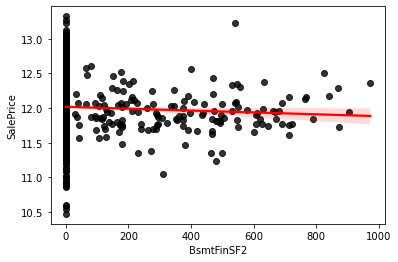

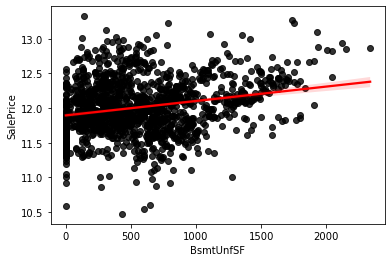

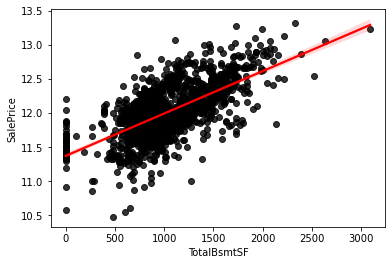

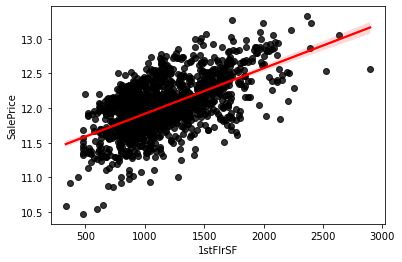

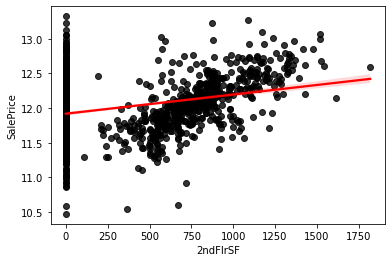

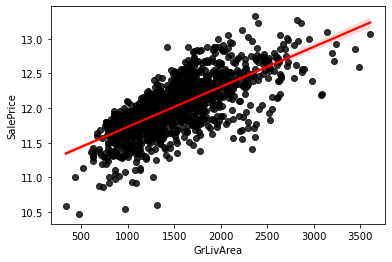

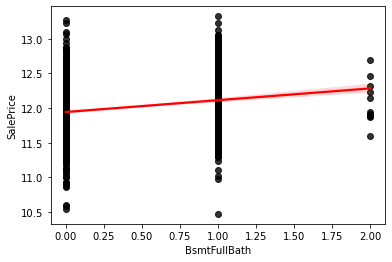

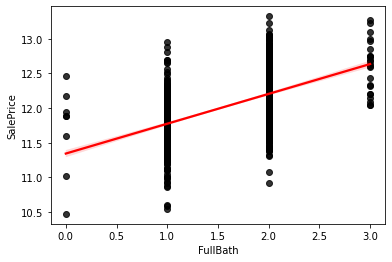

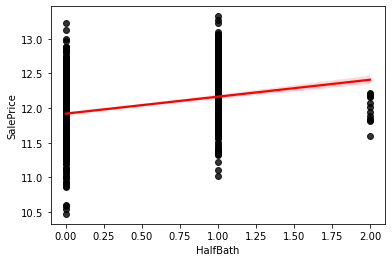

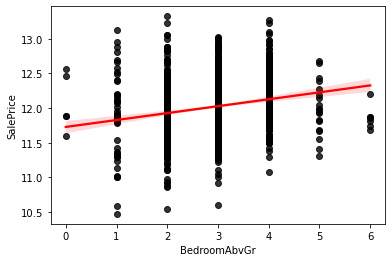

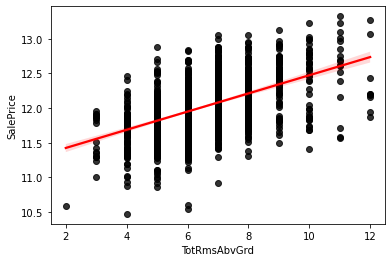

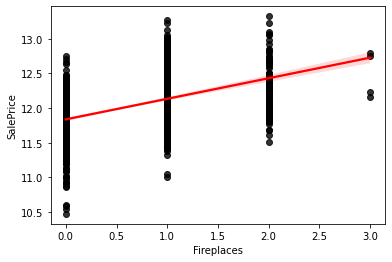

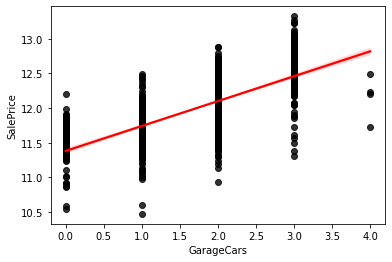

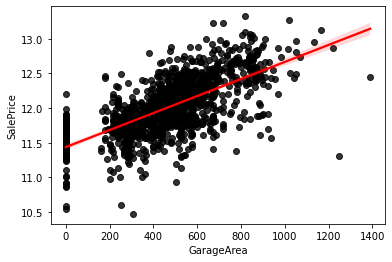

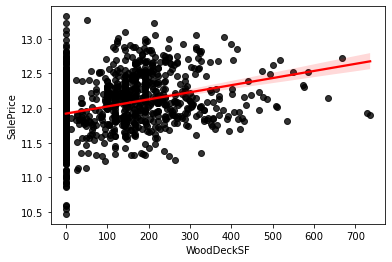

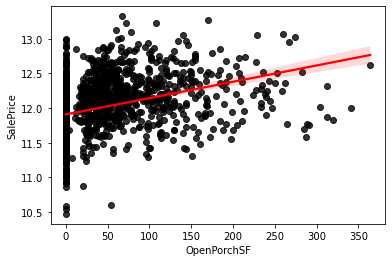

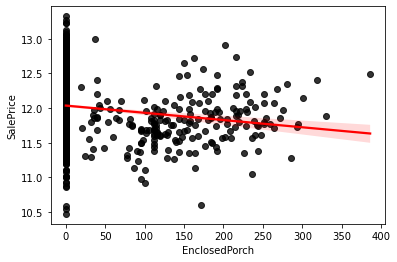

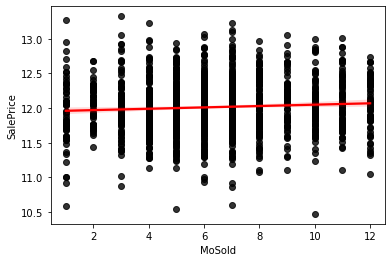

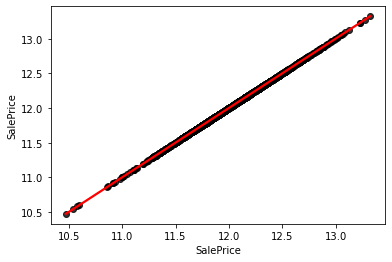

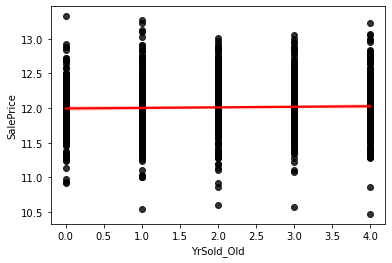

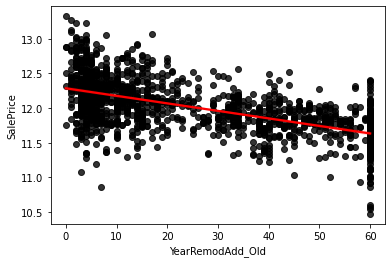

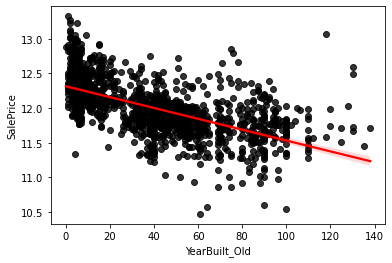

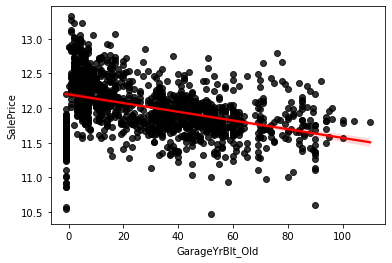

In [47]:
# Regression plot between all numerical variables and target variable('SalePrice') 
for col in num_columns:
    plt.figure()
    #sns.regplot(x=col, y='SalePrice', data=df)
    sns.regplot(x=col, y="SalePrice", data=df,
                 scatter_kws={"color": "black"}, line_kws={"color": "red"})
    plt.show()

In [48]:
# correlations of continuous variables 
df.corr()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,YrSold_Old,YearRemodAdd_Old,YearBuilt_Old,GarageYrBlt_Old
MSSubClass,1.000000,-0.384350,0.038059,-0.062449,0.022649,-0.079589,-0.065131,-0.139901,-0.260019,-0.269992,...,-0.106212,-0.019701,0.004972,-0.007025,-0.004653,-0.076210,0.017706,-0.042366,-0.031162,-0.100381
LotArea,-0.384350,1.000000,0.188026,-0.004660,0.126322,0.157460,0.070378,0.094670,0.294459,0.399435,...,0.307633,0.155250,0.134642,-0.013366,0.010823,0.392342,0.013500,-0.043922,-0.060560,0.022421
OverallQual,0.038059,0.188026,1.000000,-0.099208,0.416620,0.211424,-0.099227,0.316455,0.538943,0.466900,...,0.561119,0.235298,0.329384,-0.126189,0.073167,0.825449,0.020959,-0.553081,-0.583855,-0.423743
OverallCond,-0.062449,-0.004660,-0.099208,1.000000,-0.135168,-0.028771,0.049119,-0.147938,-0.176839,-0.144943,...,-0.148376,-0.011507,-0.046071,0.090609,-0.005545,-0.042996,-0.039127,-0.069596,0.374877,0.298440
MasVnrArea,0.022649,0.126322,0.416620,-0.135168,1.000000,0.220878,-0.066591,0.129612,0.354255,0.336401,...,0.381147,0.151230,0.134243,-0.107834,0.009393,0.441711,-0.010762,-0.180389,-0.323037,-0.206548
BsmtFinSF1,-0.079589,0.157460,0.211424,-0.028771,0.220878,1.000000,-0.047999,-0.542963,0.445362,0.369096,...,0.257960,0.174349,0.080515,-0.121174,0.005728,0.372172,-0.028764,-0.129117,-0.251368,-0.108476
BsmtFinSF2,-0.065131,0.070378,-0.099227,0.049119,-0.066591,-0.047999,1.000000,-0.196667,0.067208,0.069375,...,-0.035593,0.057903,-0.017153,0.052926,-0.005284,-0.046518,-0.034525,0.092673,0.066766,0.101597
BsmtUnfSF,-0.139901,0.094670,0.316455,-0.147938,0.129612,-0.542963,-0.196667,1.000000,0.459728,0.346136,...,0.196384,0.012349,0.131661,-0.008333,0.029145,0.234942,0.040636,-0.182264,-0.156407,-0.169312
TotalBsmtSF,-0.260019,0.294459,0.538943,-0.176839,0.354255,0.445362,0.067208,0.459728,1.000000,0.794960,...,0.477370,0.217579,0.224411,-0.119782,0.036371,0.637090,0.002712,-0.306305,-0.415970,-0.267210
1stFlrSF,-0.269992,0.399435,0.466900,-0.144943,0.336401,0.369096,0.069375,0.346136,0.794960,1.000000,...,0.478585,0.214912,0.183686,-0.088101,0.055988,0.607106,0.000662,-0.249848,-0.294668,-0.181127


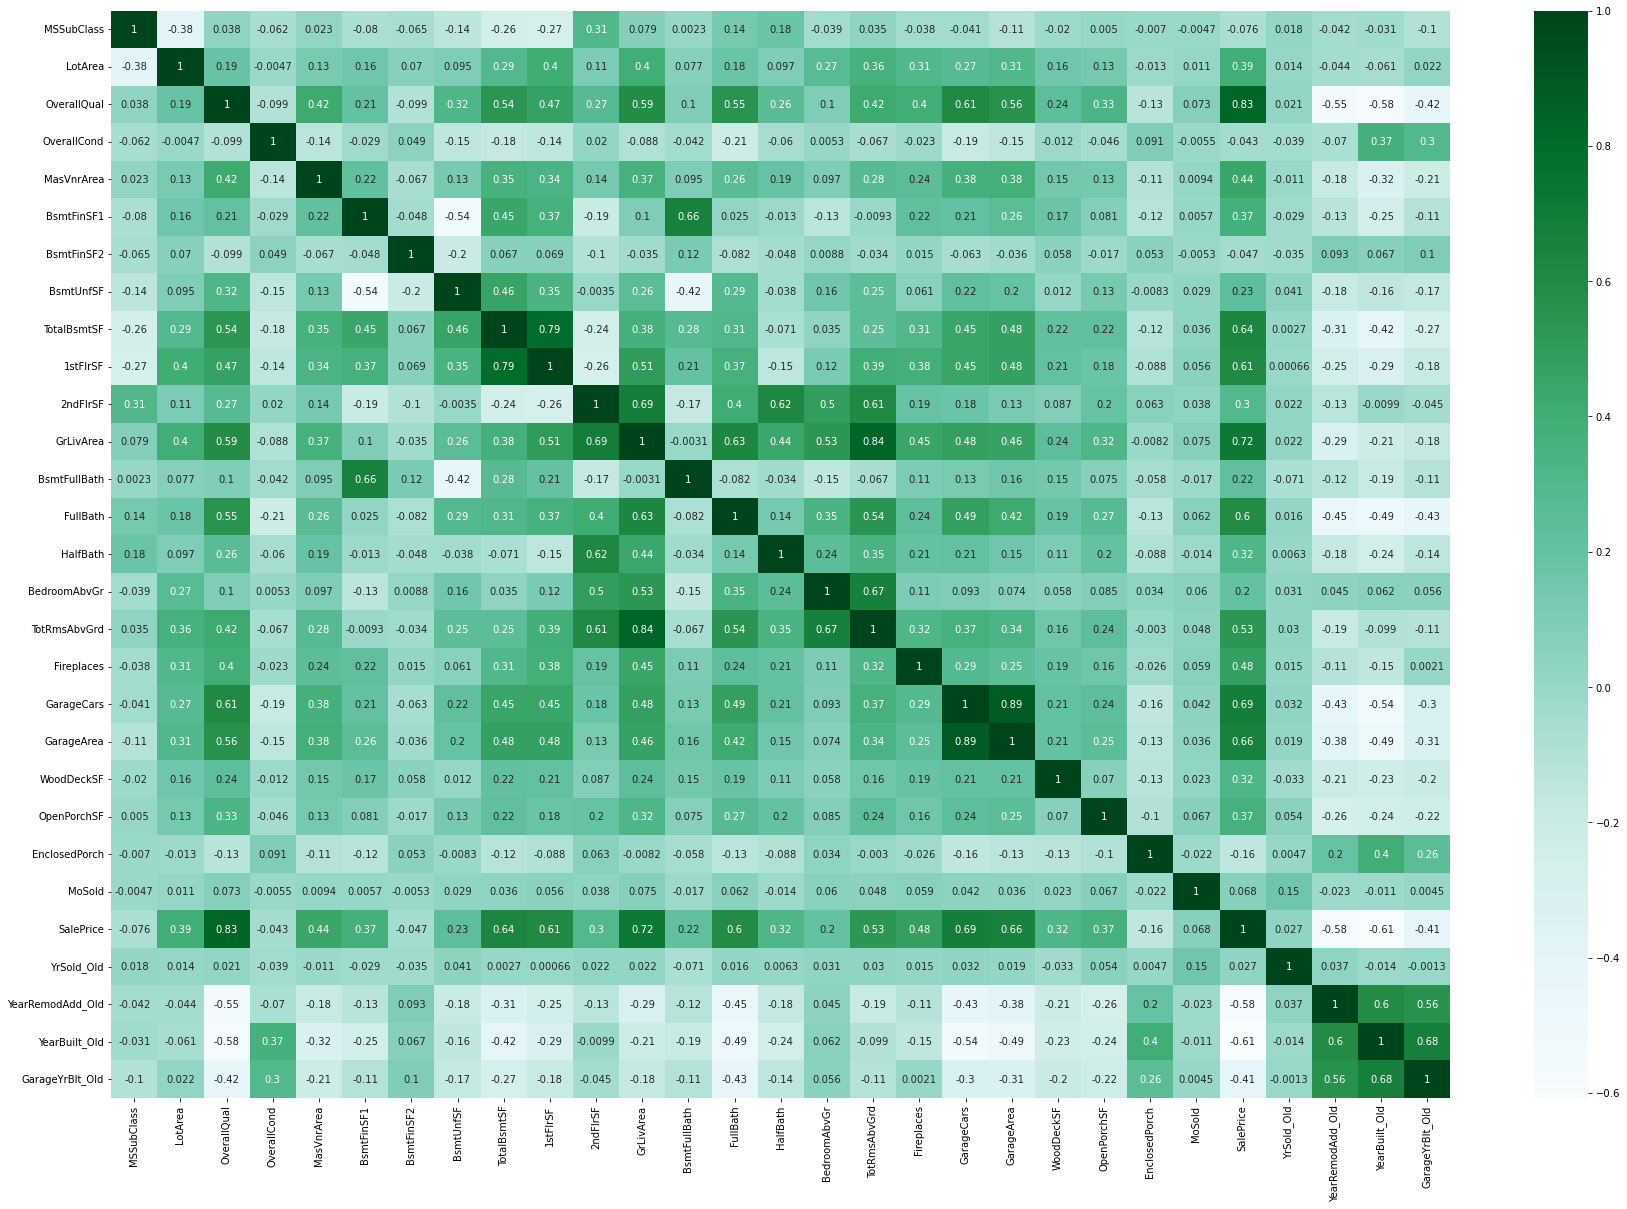

In [49]:
# Checking numerical variable correlation using heatmap
plt.figure(figsize=(30,20))
sns.heatmap(df[num_columns].corr(), cmap='BuGn', annot = True)
plt.show()

In [50]:
# drooping variables whose correlation is above 70%
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [51]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

4

In [52]:
corr_features

{'1stFlrSF', 'GarageArea', 'SalePrice', 'TotRmsAbvGrd'}

In [53]:
# dropping higly correlated features excluding SalePrice as it is our target variable
df = df.drop(['1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'],axis=1)

In [54]:
df.shape

(1417, 50)

In [55]:
cat_columns

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'SaleType',
 'SaleCondition']

# Dummy variable creation

In [56]:
# below columns having some kind of order and hence we can say these are ordinal in nature
df[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageFinish']].head()

,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageFinish
0,Gd,TA,Gd,No,GLQ,Unf,Ex,Gd,RFn
1,TA,TA,Gd,Gd,ALQ,Unf,Ex,TA,RFn
2,Gd,TA,Gd,Mn,GLQ,Unf,Ex,Gd,RFn
3,TA,TA,TA,No,ALQ,Unf,Gd,Gd,Unf
4,Gd,TA,Gd,Av,GLQ,Unf,Ex,Gd,RFn


In [57]:
# creating dummy variables of ordinal variables
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})

In [58]:
df[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageFinish']].head()

,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageFinish
0,3,2,4,1,6,1,4,3,2
1,2,2,4,4,5,1,4,2,2
2,3,2,4,2,6,1,4,3,2
3,2,2,3,1,5,1,3,3,1
4,3,2,4,3,6,1,4,3,2


In [59]:
# creating dummy variables for categorical features excluding ordinal features as we already created their dummy
dummy_col = pd.get_dummies(df[['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'GarageType',
 'SaleType',
 'SaleCondition']],drop_first=True)

df = pd.concat([df,dummy_col],axis='columns')

df = df.drop(['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'GarageType',
 'SaleType',
 'SaleCondition'],axis='columns')

In [60]:
df

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,3,2,4,1,6,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,0.0,2,2,4,4,5,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,162.0,3,2,4,2,6,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,0.0,2,2,3,1,5,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,350.0,3,2,4,3,6,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,20,7500,7,5,0.0,3,2,4,1,6,...,0,0,0,0,1,0,0,0,1,0
1455,60,7917,6,5,0.0,2,2,4,1,1,...,0,0,0,0,1,0,0,0,1,0
1456,20,13175,6,6,119.0,2,2,4,1,5,...,0,0,0,0,1,0,0,0,1,0
1457,70,9042,7,9,0.0,4,3,3,1,6,...,0,0,0,0,1,0,0,0,1,0


In [61]:
df.shape

(1417, 149)

# Train and Test split

In [62]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [63]:
df_train.shape

(991, 149)

In [64]:
df_test.shape

(426, 149)

In [65]:
# Rescaling the Features
# We will use MinMax scaling.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [66]:
# Scaling continuous features

num_var = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'SalePrice', 'YrSold_Old',
       'YearRemodAdd_Old', 'YearBuilt_Old', 'GarageYrBlt_Old']
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_test[num_var] = scaler.transform(df_test[num_var])
df_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
829,0.823529,0.035223,0.666667,0.500,0.000000,3,2,4,1,1,...,0,0,0,0,1,0,0,0,1,0
128,0.235294,0.201796,0.555556,0.500,0.254059,2,2,3,1,4,...,0,0,0,0,1,0,0,0,1,0
695,0.000000,0.407157,0.555556,0.625,0.068768,2,2,4,1,6,...,0,0,0,0,1,0,0,0,1,0
1317,0.588235,0.090879,0.666667,0.500,0.000000,3,2,5,1,1,...,0,0,1,0,0,0,0,0,0,1
150,0.000000,0.293104,0.444444,0.625,0.000000,2,2,3,3,4,...,0,0,0,0,1,0,0,0,1,0


In [67]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test


In [68]:
print(y_train.shape)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(991,)
(991, 148)
(426, 148)
(426,)


# Building model

In [69]:
# Recursive feature elimination(RFE)
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [70]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable 50
rfe = RFE(lm,50)            
rfe = rfe.fit(X_train, y_train)

In [71]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 76),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 17),
 ('ExterQual', False, 90),
 ('ExterCond', False, 41),
 ('BsmtQual', False, 81),
 ('BsmtExposure', False, 77),
 ('BsmtFinType1', False, 84),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 88),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 45),
 ('2ndFlrSF', False, 79),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 10),
 ('FullBath', False, 72),
 ('HalfBath', False, 3),
 ('BedroomAbvGr', False, 80),
 ('KitchenQual', False, 70),
 ('Fireplaces', True, 1),
 ('GarageFinish', False, 67),
 ('GarageCars', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', True, 1),
 ('MoSold', False, 98),
 ('YrSold_Old', False, 63),
 ('YearRemodAdd_Old', False, 33),
 ('YearBuilt_Old', True, 1),
 ('GarageYrBlt_Old', False, 38),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoni

In [72]:
# Printing top 50 feature which is more important for the model after RFE

col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'YearBuilt_Old',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition1_RRAe',
       'BldgType_Duplex', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd',
       'Exterior2nd_ImStucc', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'Foundation_PConc', 'Foundation_Stone',
       'Foundation_Wood', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_New', 'SaleType_Oth', 'S

In [73]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', '2ndFlrSF',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'GarageFinish', 'MoSold', 'YrSold_Old', 'YearRemodAdd_Old',
       'GarageYrBlt_Old', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NoRidge', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Feedr',
       'Condition1_Norm', 'Co

# Building model using statsmodel, for the detailed statistics

In [74]:
X_train_rfe = X_train[col]

In [75]:
X_train_rfe.shape

(991, 50)

In [76]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [77]:
y_Pred = lm.predict(X_train_rfe)
print(r2_score(y_train, y_Pred))
RSS = np.sum(np.square(y_train-y_Pred))
print(RSS)
MSE = mean_squared_error(y_train, y_Pred)
print(MSE)
RMSE = (MSE*0.5)
print(RMSE)

0.9283383292477572
1.4083297030569635
0.001421119781086744
0.000710559890543372


Text(0.5, 0, 'Errors')

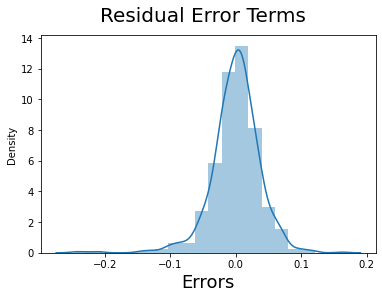

In [78]:
y_Pred = lm.predict(X_train_rfe)
res = y_train-y_Pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Residual Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

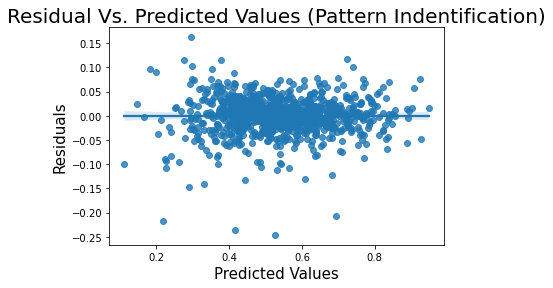

In [79]:
sns.regplot(x=y_Pred, y=res)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [80]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

# Creating X_test_new dataframe by dropping variables from X_test using final trained column information

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable to X_test_new dataset

X_test_new = sm.add_constant(X_test_new)

In [81]:
X_test_new

,const,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GrLivArea,Fireplaces,...,Foundation_PConc,Foundation_Stone,Foundation_Wood,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Normal
995,1.0,0.106790,0.333333,0.750,0.175503,0.000000,0.155394,0.241435,0.273671,0.000000,...,0,0,0,0,0,0,0,0,0,0
810,1.0,0.285974,0.555556,0.625,0.303016,0.387860,0.000000,0.336134,0.297801,0.333333,...,0,0,0,0,0,0,0,0,0,1
781,1.0,0.187370,0.555556,0.500,0.176874,0.000000,0.160103,0.245960,0.387599,0.000000,...,1,0,0,0,0,0,0,0,0,1
859,1.0,0.315320,0.555556,0.750,0.282907,0.000000,0.186216,0.340659,0.708613,0.333333,...,0,0,0,0,0,0,0,0,0,1
584,1.0,0.153270,0.333333,0.750,0.000000,0.000000,0.378425,0.285714,0.378436,0.000000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,1.0,0.013634,0.333333,0.750,0.226234,0.000000,0.057791,0.203620,0.090409,0.000000,...,0,0,0,0,0,0,0,0,0,1
1445,1.0,0.228535,0.555556,0.500,0.085466,0.645062,0.000000,0.263090,0.176848,0.000000,...,0,0,0,0,0,0,0,0,0,1
397,1.0,0.201796,0.444444,0.500,0.246801,0.000000,0.138699,0.279250,0.451436,0.333333,...,0,0,0,0,0,0,0,0,0,1
1382,1.0,0.188922,0.666667,0.750,0.000000,0.000000,0.255137,0.192631,0.436164,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [82]:
y_pred = lm.predict(X_test_new)

In [83]:
r2_test=r2_score(y_test, y_pred)
round(r2_test,3)

0.903

In [84]:
RSS_test = np.sum(np.square(y_test-y_pred))
RSS_test

0.783776588294069

In [85]:
MSE_test = mean_squared_error(y_test,y_pred)
MSE_test

0.001839851146230209

In [86]:
RMSE_test = (MSE_test*0.5)
print(RMSE_test)

0.0009199255731151045


# LASSO Regression

In [87]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
folds = 3
# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_cv.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [88]:
# Printing the best hyperparameter alpha
print(lasso_cv.best_params_)

{'alpha': 0.0001}


In [89]:
# Fitting data using our best aplha or lambda value
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [90]:
# printing coefficient values of all our 148 features
lasso.coef_

array([-1.48186830e-02,  7.77113235e-02,  1.72140766e-01,  1.32724967e-01,
        8.74477439e-03,  6.73046368e-03, -6.42511444e-03,  5.47950725e-03,
        3.83288206e-03,  2.27739227e-03,  5.36936609e-02,  7.51366116e-04,
        1.72758328e-03, -0.00000000e+00,  9.83358243e-02,  7.28886322e-03,
        0.00000000e+00,  2.81512969e-01,  8.56764771e-03,  0.00000000e+00,
        1.67502541e-02,  2.49106954e-05,  5.41292711e-03,  2.72566036e-02,
        4.27918690e-03,  6.35094520e-02,  1.58581896e-02,  2.05946120e-02,
        1.66987842e-02,  0.00000000e+00,  5.10884132e-03, -9.45105020e-03,
       -9.88149472e-02,  8.96677146e-03,  1.39726157e-02, -0.00000000e+00,
        1.59104899e-02,  0.00000000e+00,  3.88507299e-04,  0.00000000e+00,
        3.67836190e-04,  8.32613381e-03, -9.39129531e-03, -0.00000000e+00,
       -1.17582748e-03,  0.00000000e+00, -0.00000000e+00,  1.00956959e-02,
        0.00000000e+00, -1.02337660e-03,  4.22107953e-02, -1.44875454e-02,
       -4.77543061e-03, -

In [91]:
len(lasso.coef_)

148

In [92]:
#printing R2, RSS, MSE values for test and train sets in Lasso

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric3.append(mse_test_lr)

r2_train:
0.9337122381196836
r2_test:
0.9053440397747379
RSS_train:
1.3027190550437302
RSS_test:
0.7649989180363177
MSE_train:
0.001314550005089536
MSE_test:
0.0017957721080664735


In [93]:
# Printing coefficient of Lasso model made with different range of alpha(lamda) value
cv_result_lsso = pd.DataFrame(lasso_cv.cv_results_)
cv_result_lsso['param_alpha'] = cv_result_lsso['param_alpha'].astype('float32')
cv_result_lsso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.009596,0.002259,0.005334,0.003772,0.0001,{'alpha': 0.0001},-0.030873,-0.028658,-0.028762,-0.029431,0.001021,1,-0.023753,-0.025369,-0.024876,-0.024666,0.000676
1,0.008171,0.000241,0.005332,0.003771,0.0010,{'alpha': 0.001},-0.034418,-0.033274,-0.032512,-0.033401,0.000783,2,-0.031247,-0.032254,-0.031749,-0.031750,0.000411
2,0.003758,0.005314,0.003018,0.004268,0.0100,{'alpha': 0.01},-0.065482,-0.061071,-0.065019,-0.063857,0.001979,3,-0.062144,-0.064344,-0.063698,-0.063395,0.000923
3,0.007800,0.001982,0.002144,0.002657,0.1000,{'alpha': 0.1},-0.112899,-0.103235,-0.113202,-0.109779,0.004629,4,-0.108376,-0.112887,-0.107998,-0.109754,0.002221
4,0.000000,0.000000,0.003303,0.004671,0.2000,{'alpha': 0.2},-0.112899,-0.103352,-0.113202,-0.109818,0.004574,5,-0.108376,-0.112995,-0.107998,-0.109790,0.002272


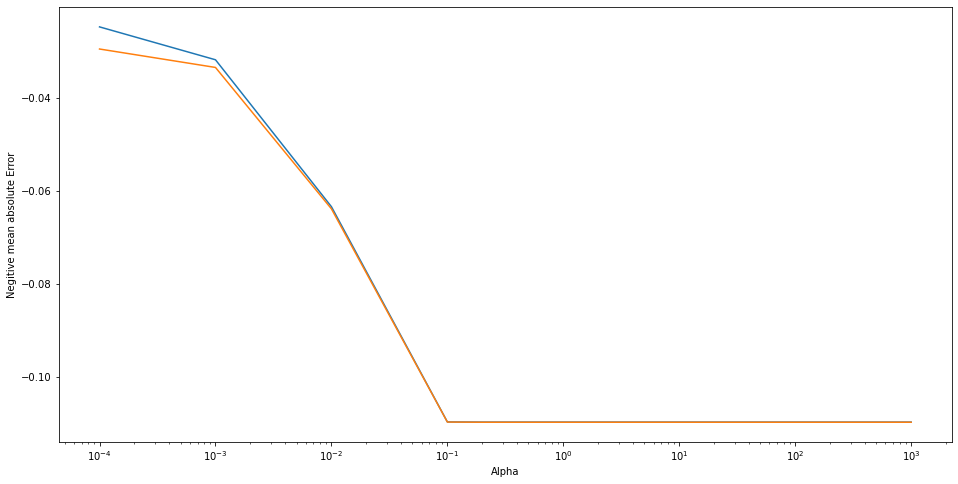

In [94]:
#  Visualising of different value of alpha on Negative mean absolute Error
plt.figure(figsize=(16,8))
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_train_score'])
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negitive mean absolute Error')
plt.xlabel('Alpha')
plt.show()

In [95]:
#checking r2 for the alpha 0.0001 on train and test set
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train ,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9337122381196836
0.9053440397747379


In [96]:
# printing top 10 features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
18,BsmtFullBath,0.281513
3,OverallCond,0.172141
4,MasVnrArea,0.132725
15,HeatingQC,0.098336
2,OverallQual,0.077711
26,WoodDeckSF,0.063509
11,BsmtFinType2,0.053694
0,MSSubClass,0.045583
51,Neighborhood_Edwards,0.042211
67,Neighborhood_Timber,0.039425


In [97]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0148
1,LotArea,0.0777
2,OverallQual,0.1721
3,OverallCond,0.1327
4,MasVnrArea,0.0087
...,...,...
79,SaleType_CWD,0.0022
80,SaleType_New,0.0315
81,SaleType_Oth,0.0116
82,SaleType_WD,-0.0069


# Ridge regression

In [98]:
# list of alphas

X_test_new = X_test_new.drop(['const'], axis=1)



params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [99]:
# the best hyperparameter alpha
print(ridge_cv.best_params_)

{'alpha': 0.7}


In [100]:
#fit the data to ridge
ridge = Ridge(alpha=0.7)
ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 0.09457142  0.19282215  0.15419813  0.09987175  0.01443916  0.01738377
  0.08828789  0.28263235  0.03275821  0.08162116  0.02061128  0.02702673
  0.02723982 -0.13987236  0.05486108  0.02225551  0.04501337  0.02635274
  0.04926348 -0.03073211 -0.01425947  0.02910252  0.04503476 -0.04026324
 -0.01605402 -0.00832352 -0.06675821  0.01850393 -0.01268865 -0.01987227
  0.02709737 -0.01805596 -0.01909765 -0.00832352 -0.01268865  0.02713493
  0.02602777 -0.02834482  0.02198281  0.0177667   0.02247284  0.02159096
 -0.02815623  0.03305514  0.02954613  0.01537262  0.04644124  0.05782804
  0.01284474  0.02348089]


In [101]:
len(ridge.coef_)

50

In [102]:
# display the mean scores
ridge_results = pd.DataFrame(ridge_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=500]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
9,0.7,-0.026604,-0.028828,1
10,0.8,-0.026639,-0.028830,2
8,0.6,-0.026570,-0.028831,3
11,0.9,-0.026677,-0.028835,4
12,1.0,-0.026716,-0.028842,5
7,0.5,-0.026539,-0.028844,6
6,0.4,-0.026509,-0.028866,7
5,0.3,-0.026480,-0.028892,8
4,0.2,-0.026451,-0.028929,9
3,0.1,-0.026422,-0.028983,10


In [103]:
#printing R2, RSS, MSE for test train sets
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric2.append(mse_test_lr)

r2_train:
0.9278020020128686
r2_test:
0.9014577723966524
RSS_train:
1.4188698644504003
RSS_test:
0.796407297734333
MSE_train:
0.0014317556654393545
MSE_test:
0.0018695006989068851


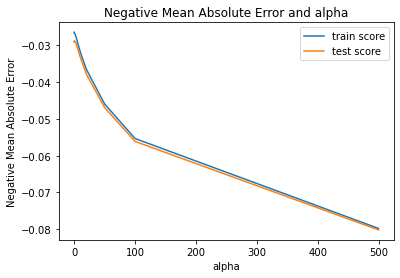

In [104]:
# plotting mean test and train scoes with alpha 

ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [105]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train_new.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0946
1,OverallQual,0.1928
2,OverallCond,0.1542
3,BsmtFinSF1,0.0999
4,BsmtFinSF2,0.0144
5,BsmtUnfSF,0.0174
6,TotalBsmtSF,0.0883
7,GrLivArea,0.2826
8,Fireplaces,0.0328
9,GarageCars,0.0816


In [106]:
#getting top 10 parameters from ridge
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train_new[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
8,Fireplaces,0.282632
2,OverallCond,0.192822
3,BsmtFinSF1,0.154198
4,BsmtFinSF2,0.099872
1,OverallQual,0.094571
7,GrLivArea,0.088288
10,WoodDeckSF,0.081621
0,LotArea,0.060817
48,SaleCondition_AdjLand,0.057828
15,MSZoning_RH,0.054861


# Comparing the results of Ridge and lasso

In [107]:
resultTable = {'Metric':["R2 Score Train", "R2Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric2}
linear_metric = pd.DataFrame()
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric3, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

,Metric,Ridge regression,Lasso regression
0,R2 Score Train,0.927802,0.933712
1,R2Score Test,0.901458,0.905344
2,RSS Train,1.418870,1.302719
3,RSS Test,0.796407,0.764999
4,MSE Train,0.001432,0.001315
5,MSE Test,0.001870,0.001796


# PART 2 - Subjective Questions

In [108]:
ridge = Ridge(alpha=1.4)
ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 0.09175092  0.19210909  0.14759444  0.09918139  0.01451935  0.01776573
  0.08811326  0.27012758  0.0365075   0.0840972   0.02254776  0.02906486
  0.02583324 -0.13162486  0.04605284  0.01308625  0.03702416  0.01690985
  0.04892347 -0.02953638 -0.01287145  0.02929611  0.04371164 -0.03611887
 -0.01432271 -0.00629219 -0.0546549   0.01801012 -0.01070715 -0.01298186
  0.02448338 -0.01505634 -0.0185208  -0.00629219 -0.01070715  0.02171799
  0.02232981 -0.02594872  0.01968338  0.01671171  0.02413833  0.01821374
 -0.02052145  0.02907816  0.02100889  0.01218676  0.04614299  0.04462651
  0.00847229  0.023148  ]


In [109]:
len(ridge.coef_)

50

In [110]:
#printing R2, RSS, MSE for test train sets
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric2.append(mse_test_lr)

r2_train:
0.9267719634313754
r2_test:
0.9000550563376067
RSS_train:
1.439112679254801
RSS_test:
0.8077438925449331
MSE_train:
0.0014521823201360253
MSE_test:
0.001896112423814397


In [111]:
ridge_df = pd.DataFrame({'Features':X_train_new.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0918
1,OverallQual,0.1921
2,OverallCond,0.1476
3,BsmtFinSF1,0.0992
4,BsmtFinSF2,0.0145
5,BsmtUnfSF,0.0178
6,TotalBsmtSF,0.0881
7,GrLivArea,0.2701
8,Fireplaces,0.0365
9,GarageCars,0.0841


In [112]:
#getting top 10 parameters from ridge
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train_new[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
8,Fireplaces,0.270128
2,OverallCond,0.192109
3,BsmtFinSF1,0.147594
4,BsmtFinSF2,0.099181
1,OverallQual,0.091751
7,GrLivArea,0.088113
10,WoodDeckSF,0.084097
0,LotArea,0.073114
19,Neighborhood_MeadowV,0.048923
47,SaleType_Oth,0.046143


In [113]:
lasso = Lasso(alpha=0.0002)
lasso.fit(X_train, y_train)
print(lasso.coef_)

[-1.55789487e-02  7.24638097e-02  1.72076809e-01  1.23732154e-01
  6.36912180e-03  8.67480535e-03 -3.86170227e-03  6.53957267e-03
  4.29791078e-03  2.56674990e-03  5.16333756e-02  1.07470098e-03
  0.00000000e+00  0.00000000e+00  9.65210957e-02  7.59027854e-03
  0.00000000e+00  2.79175933e-01  7.59132959e-03  0.00000000e+00
  1.70052534e-02  0.00000000e+00  6.72373922e-03  2.86382987e-02
  4.71248202e-03  6.65325644e-02  1.03538671e-02  1.81080262e-02
  8.43954718e-03  0.00000000e+00  4.19685562e-03 -7.91840846e-03
 -8.13999225e-02  4.50749207e-03  1.38107093e-02  0.00000000e+00
  1.99412564e-02 -1.44061170e-05  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  7.35375981e-03 -5.12444959e-03 -0.00000000e+00
 -4.92221813e-04  0.00000000e+00 -0.00000000e+00  8.58514545e-03
  0.00000000e+00 -6.53612236e-04  3.89726041e-02 -1.46522812e-02
 -3.05923676e-03 -8.70582835e-03 -4.70141137e-03 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  1.59095766e-02 -3.20175

In [114]:
len(lasso.coef_)

148

In [115]:
#printing R2, RSS, MSE values for test and train sets in Lasso

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric3.append(mse_test_lr)

r2_train:
0.9303696400897612
r2_test:
0.9030985404253903
RSS_train:
1.3684094030568905
RSS_test:
0.7831467934433618
MSE_train:
0.0013808369354761762
MSE_test:
0.0018383727545618822


In [116]:
# printing top 10 features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
18,BsmtFullBath,0.279176
3,OverallCond,0.172077
4,MasVnrArea,0.123732
15,HeatingQC,0.096521
2,OverallQual,0.072464
26,WoodDeckSF,0.066533
11,BsmtFinType2,0.051633
51,Neighborhood_Edwards,0.038973
141,SaleType_Oth,0.031729
67,Neighborhood_Timber,0.031018


In [117]:
# Put the shortlisted Features and coefficienst in a dataframe
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0156
1,LotArea,0.0725
2,OverallQual,0.1721
3,OverallCond,0.1237
4,MasVnrArea,0.0064
...,...,...
59,GarageType_Basment,-0.0040
60,GarageType_Detchd,0.0019
61,SaleType_New,0.0317
62,SaleType_WD,-0.0051


In [118]:
resultTable = {'Metric':["R2 Score Train", "R2Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric2}
linear_metric = pd.DataFrame()
rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric3, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

,Metric,Ridge regression,Lasso regression
0,R2 Score Train,0.926772,0.930370
1,R2Score Test,0.900055,0.903099
2,RSS Train,1.439113,1.368409
3,RSS Test,0.807744,0.783147
4,MSE Train,0.001452,0.001381
5,MSE Test,0.001896,0.001838


In [119]:
df = df.drop(['BsmtFullBath', 'OverallCond', 'MasVnrArea', 'HeatingQC', 'OverallQual'], axis=1)

In [120]:
df_train, df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [121]:
num_var=['MSSubClass', 'LotArea',
         'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'SalePrice', 'YrSold_Old',
       'YearRemodAdd_Old', 'YearBuilt_Old', 'GarageYrBlt_Old']

df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_test[num_var] = scaler.transform(df_test[num_var])
df_train.head()

,MSSubClass,LotArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
829,0.823529,0.035223,3,2,4,1,1,0.000000,1,0.000000,...,0,0,0,0,1,0,0,0,1,0
128,0.235294,0.201796,2,2,3,1,4,0.234004,1,0.000000,...,0,0,0,0,1,0,0,0,1,0
695,0.000000,0.407157,2,2,4,1,6,0.447898,2,0.041152,...,0,0,0,0,1,0,0,0,1,0
1317,0.588235,0.090879,3,2,5,1,1,0.000000,1,0.000000,...,0,0,1,0,0,0,0,0,0,1
150,0.000000,0.293104,2,2,3,3,4,0.327239,1,0.000000,...,0,0,0,0,1,0,0,0,1,0


In [122]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

In [123]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable 50
rfe = RFE(lm,50)            
rfe = rfe.fit(X_train, y_train)

In [124]:
col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp1 = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp1 = temp1.loc[temp1['rfe_support'] == True]
temp1.reset_index(drop=True, inplace=True)
temp1

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,ExterQual,True,1
2,BsmtFinSF1,True,1
3,BsmtFinSF2,True,1
4,BsmtUnfSF,True,1
5,TotalBsmtSF,True,1
6,GrLivArea,True,1
7,Fireplaces,True,1
8,GarageCars,True,1
9,OpenPorchSF,True,1


In [125]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [126]:
# Fitting data using our best aplha or lambda value
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [127]:
#printing R2, RSS, MSE values for test and train sets in Lasso

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric3.append(mse_test_lr)

r2_train:
0.8971772218854365
r2_test:
0.8692910907669736
RSS_train:
2.0207228082948796
RSS_test:
1.056374832636119
MSE_train:
0.0020390744786023002
MSE_test:
0.0024797531282538007


In [128]:
# printing top 10 features
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
7,BsmtFinSF1,0.332367
0,MSSubClass,0.232412
6,BsmtFinType1,0.112659
9,BsmtFinSF2,0.092736
3,ExterCond,0.085113
1,LotArea,0.062740
17,KitchenQual,0.061599
21,WoodDeckSF,0.058774
8,BsmtFinType2,0.040728
50,Neighborhood_Mitchel,0.036577
